In [1]:
import pandas as pd
import numpy as np

# import data

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.shape

(684, 13)

# checking NA values 

In [4]:
df.isnull().sum()

Requirement Text                      0
Type                                  0
Sensor context                      654
System context                      591
Transactional context               464
Network context                     639
Mobility context                    616
Social context                      630
Third party Software Integration    583
GUI                                 472
Search                              645
Misc                                684
clean_req_text                        0
dtype: int64

In [5]:
df.fillna(0,axis=1,inplace =True)

In [6]:
df.isnull().sum()

Requirement Text                    0
Type                                0
Sensor context                      0
System context                      0
Transactional context               0
Network context                     0
Mobility context                    0
Social context                      0
Third party Software Integration    0
GUI                                 0
Search                              0
Misc                                0
clean_req_text                      0
dtype: int64

# Removing unnecessary columns

In [7]:
df = df.iloc[:,2:]

In [8]:
df.head()

,Sensor context,System context,Transactional context,Network context,Mobility context,Social context,Third party Software Integration,GUI,Search,Misc,clean_req_text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,text element user interface present select lan...
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,english available language
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,dutch available language
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,sub app launcher add main app qualified progra...
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,sub app launcher main app delete qualified pro...


# checking for duplicate rows

In [9]:
df.duplicated().sum()

13

In [10]:
# df[df.duplicated()]

In [11]:
df = df[~df.duplicated()]

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(671, 11)

In [14]:
df.reset_index(inplace = True)

In [15]:
# df.head()

In [16]:
df = df.iloc[:,1:]

In [17]:
# df.head(2)

In [18]:
pip --version


pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [19]:
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Embedding,Dropout,Flatten
from keras.initializers import Constant

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import Word2Vec

import re

import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True


## Write the function for cleaning the text data

In [20]:
def clean_data(text):
  #   # 2. Retaining only alphabets.
  text = re.sub("[^a-zA-Z]"," ",str(text))
  
  # 3. Converting to lower case and splitting
  word_tokens= text.lower().split()
  
  # 4. Remove stopwords
  le=WordNetLemmatizer()
  stop_words= set(stopwords.words("english"))     
  word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words] 
  cleaned_text=" ".join(word_tokens)
  
  return cleaned_text

  

In [21]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for text in df['clean_req_text']:
  sents=tokenizer.tokenize(text.strip())
  # print(len(sents))
  sum+=len(sents)
  for sent in sents:
    cleaned_sent=clean_data(sent)
    # print(cleaned_sent)
    sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))  # total no of sentences


682
682


In [22]:

# from gensim.utils import simple_preprocess
# sentences1 =[]                                       # can use gensim.utils.simple_preprocess for text cleaning
# for sent in df['clean_req_text']:
#   print(simple_preprocess(sent))
#   sentences1.append(simple_preprocess(sent))
# len(sentences1)

In [23]:
sentences[:2]

[['text',
  'element',
  'user',
  'interface',
  'present',
  'select',
  'language',
  'language',
  'selection',
  'requirement',
  'ucar',
  'num',
  'available',
  'language',
  'mention',
  'ucar',
  'ucar'],
 ['english', 'available', 'language']]

In [24]:
model=Word2Vec(sentences=sentences,size=300,window=10,min_count=1)

In [25]:
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(31819, 39925)

In [26]:
model.wv.most_similar("text")

[('question', 0.9999465942382812),
 ('number', 0.9999426603317261),
 ('message', 0.9999421834945679),
 ('error', 0.9999417066574097),
 ('able', 0.9999406337738037),
 ('select', 0.9999396204948425),
 ('level', 0.9999394416809082),
 ('contain', 0.9999382495880127),
 ('game', 0.9999376535415649),
 ('request', 0.9999376535415649)]

In [27]:
model.wv.most_similar("selection")

[('datum', 0.9999355673789978),
 ('time', 0.9999351501464844),
 ('shall', 0.9999344348907471),
 ('base', 0.9999337196350098),
 ('provide', 0.9999337196350098),
 ('interface', 0.9999324679374695),
 ('error', 0.9999322891235352),
 ('request', 0.999932050704956),
 ('data', 0.9999316334724426),
 ('card', 0.9999313354492188)]

In [28]:
model.wv.similarity(w1="user", w2="available")

0.99995816

In [29]:
model['text'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(300,)

In [30]:
model.wv.vocab

{'text': <gensim.models.keyedvectors.Vocab at 0x7fecac8febd0>,
 'element': <gensim.models.keyedvectors.Vocab at 0x7fed2bb66d90>,
 'user': <gensim.models.keyedvectors.Vocab at 0x7fed2bb66890>,
 'interface': <gensim.models.keyedvectors.Vocab at 0x7fed2bb665d0>,
 'present': <gensim.models.keyedvectors.Vocab at 0x7fed2bb66490>,
 'select': <gensim.models.keyedvectors.Vocab at 0x7feca8068090>,
 'language': <gensim.models.keyedvectors.Vocab at 0x7feca8068150>,
 'selection': <gensim.models.keyedvectors.Vocab at 0x7feca80681d0>,
 'requirement': <gensim.models.keyedvectors.Vocab at 0x7fed2bb66390>,
 'ucar': <gensim.models.keyedvectors.Vocab at 0x7feca8068250>,
 'num': <gensim.models.keyedvectors.Vocab at 0x7feca8068210>,
 'available': <gensim.models.keyedvectors.Vocab at 0x7feca8068050>,
 'mention': <gensim.models.keyedvectors.Vocab at 0x7feca80682d0>,
 'english': <gensim.models.keyedvectors.Vocab at 0x7feca80680d0>,
 'dutch': <gensim.models.keyedvectors.Vocab at 0x7feca8068350>,
 'sub': <gensim

In [31]:
print("The total number of words are : ",len(model.wv.vocab))

The total number of words are :  1209


In [32]:
# model.wv.vocab

In [33]:
# print(vocab)
vocab=list(model.wv.index2word)

word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size
  

The no of key-value pairs :  1209


In [34]:
df['clean_txt']= df['clean_req_text'].apply(clean_data)

In [35]:
df['clean_req_text'].values[:20]

array(['text element user interface present select language language selection requirement ucar num available language mention ucar002 ucar003',
       'english available language', 'dutch available language',
       'sub app launcher add main app qualified programmer',
       'sub app launcher main app delete qualified programmer',
       'administrator change color user interface sub app main app include external resource',
       'administrator change font user interface sub app main app include external resource',
       'administrator change icon user interface sub app main app include external resource',
       'administrator change button user interface sub app main app include external resource',
       'administrator change background user interface sub- app main app include external resource',
       'administrator change text element user interface sub app main app include external resource',
       'language select main app', 'default language insertion english',
       'ma

In [36]:
df['clean_txt'].values[:20]

array(['text element user interface present select language language selection requirement ucar num available language mention ucar ucar',
       'english available language', 'dutch available language',
       'sub app launcher add main app qualified programmer',
       'sub app launcher main app delete qualified programmer',
       'administrator change color user interface sub app main app include external resource',
       'administrator change font user interface sub app main app include external resource',
       'administrator change icon user interface sub app main app include external resource',
       'administrator change button user interface sub app main app include external resource',
       'administrator change background user interface sub app main app include external resource',
       'administrator change text element user interface sub app main app include external resource',
       'language select main app', 'default language insertion english',
       'main menu

In [37]:
# number of unique words = 1209.

# now since we will have to pad we need to find the maximum lenght of any document.

max=-1
for i,rev in enumerate(df['clean_txt']):
  tokens=rev.split()
  # print(tokens)
  if(len(tokens)>max):
    max=len(tokens)
print(max)

107


In [38]:
tok = Tokenizer()
tok.fit_on_texts(df['clean_txt'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(df['clean_txt'])
encd_rev

[[41, 204, 1, 57, 321, 8, 34, 34, 247, 128, 80, 29, 66, 34, 743, 80, 80],
 [141, 66, 34],
 [322, 66, 34],
 [178, 42, 165, 35, 30, 42, 537, 538],
 [178, 42, 165, 30, 42, 58, 537, 538],
 [9, 50, 248, 1, 57, 178, 42, 30, 42, 36, 166, 278],
 [9, 50, 744, 1, 57, 178, 42, 30, 42, 36, 166, 278],
 [9, 50, 249, 1, 57, 178, 42, 30, 42, 36, 166, 278],
 [9, 50, 43, 1, 57, 178, 42, 30, 42, 36, 166, 278],
 [9, 50, 745, 1, 57, 178, 42, 30, 42, 36, 166, 278],
 [9, 50, 41, 204, 1, 57, 178, 42, 30, 42, 36, 166, 278],
 [34, 8, 30, 42],
 [156, 34, 746, 141],
 [30, 23, 51, 165, 27, 42],
 [30, 23, 51, 165, 179, 42],
 [30, 23, 51, 165, 279, 42],
 [30, 23, 51, 165, 167, 42],
 [30, 23, 51, 165, 180, 42],
 [30, 23, 51, 165, 323, 747, 42],
 [30, 23, 51, 165, 439, 42, 322, 34, 539],
 [30, 23, 51, 165, 540, 541, 42, 322, 34, 539],
 [31, 250, 542, 30, 23],
 [31, 324, 542, 30, 23],
 [24, 180, 205, 23],
 [24, 167, 205, 23],
 [205, 23, 180, 1, 142, 181, 280, 76, 180],
 [205, 23, 167, 1, 142, 181, 280, 76, 167],
 [205,

In [39]:
vocab_size

1210

In [40]:
max_rev_len=108  # max lenght of a sent
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [41]:
# now padding to have a amximum length of 108
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape

(671, 108)

In [42]:
# now creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
# if word is not found then embed_vector corressponding to that vector will stay zero.

In [43]:
# checking.
print(embed_matrix[14])

[ 5.79347722e-02 -2.82683343e-01 -5.07709756e-02 -2.68790931e-01
 -1.29461855e-01  3.24886709e-01 -2.45708525e-02 -2.00249866e-01
 -2.96863317e-01 -1.02453403e-01 -2.81221420e-01  9.66032296e-02
  2.86176831e-01  1.10017650e-01 -1.73680812e-01  9.86796692e-02
  9.66591090e-02  1.47077084e-01  1.87096611e-01 -1.17293678e-01
 -1.44599542e-01  7.51327127e-02 -4.26181592e-02  4.13250849e-02
  3.19913472e-03 -1.39588997e-01 -1.62544563e-01 -2.98513412e-01
 -1.18134171e-01  3.46208252e-02  2.48514652e-01 -6.81872945e-03
  2.92491972e-01 -2.87646637e-03  1.52709752e-01 -7.82163590e-02
 -8.36581588e-02  1.81070372e-01 -3.61020863e-01  3.02296337e-02
 -1.00343943e-01  2.95341939e-01 -1.75020710e-01  7.87195787e-02
  5.39228600e-03 -5.25107491e-04  1.72887817e-01 -1.99191973e-01
 -1.28777817e-01  1.04509495e-01  1.67313129e-01  1.53181881e-01
 -9.17438641e-02  3.22549045e-01  1.43142983e-01 -1.21325485e-01
  1.23777293e-01  2.11558431e-01  1.98941454e-01 -7.94495642e-02
 -2.69225657e-01 -1.98316

In [44]:
y = df.iloc[:,:10]
y.head(2)

,Sensor context,System context,Transactional context,Network context,Mobility context,Social context,Third party Software Integration,GUI,Search,Misc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
# prepare train and val sets first
y = df.iloc[:,:10]

x_train,x_test,y_train,y_test=train_test_split(pad_rev,y,test_size=0.10,random_state=42)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((603, 108), (68, 108), (603, 10), (68, 10))

In [47]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [48]:
x_train.shape

(603, 108, 1)

In [49]:
x_train[0].shape

(108, 1)

In [50]:
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(units=64,input_shape = (x_train[0].shape),return_sequences=True))
model.add(LSTM(units=128,return_sequences=False))
# model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(y_train.shape[1],activation='sigmoid')) # sigmod for bin. classification.

# model = Sequential()
# model.add(Dense(vocab_size, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
# model.add(Dense(600, kernel_initializer='normal', activation='relu'))
# model.add(Dense(600, kernel_initializer='normal', activation='relu'))
# # model.add(Dense(50, kernel_initializer='normal', activation='relu'))
# model.add(Dense(y_train.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 108, 300)          363000    
                                                                 
 lstm (LSTM)                 (None, 108, 64)           93440     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [52]:

my_callbacks = [
    EarlyStopping(patience=5)]
history = model.fit(x_train, y_train,validation_split=0.2, epochs=5000, batch_size=512,callbacks = my_callbacks)

Epoch 1/5000
1/1 [==============================] - 9s 9s/step - loss: 0.6932 - accuracy: 0.1286 - val_loss: 0.6929 - val_accuracy: 0.2975
Epoch 2/5000
1/1 [==============================] - 0s 185ms/step - loss: 0.6929 - accuracy: 0.2178 - val_loss: 0.6925 - val_accuracy: 0.2975
Epoch 3/5000
1/1 [==============================] - 0s 168ms/step - loss: 0.6925 - accuracy: 0.2469 - val_loss: 0.6922 - val_accuracy: 0.2975
Epoch 4/5000
1/1 [==============================] - 0s 150ms/step - loss: 0.6922 - accuracy: 0.2220 - val_loss: 0.6919 - val_accuracy: 0.2975
Epoch 5/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.6919 - accuracy: 0.2365 - val_loss: 0.6916 - val_accuracy: 0.2975
Epoch 6/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.6916 - accuracy: 0.2365 - val_loss: 0.6912 - val_accuracy: 0.2975
Epoch 7/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.6912 - accuracy: 0.2137 - val_loss: 0.6909 - val_accuracy: 0.2975
Epoch 8/5

In [53]:
# history.history.keys()

In [54]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.294


In [55]:
model.save("model.h5")

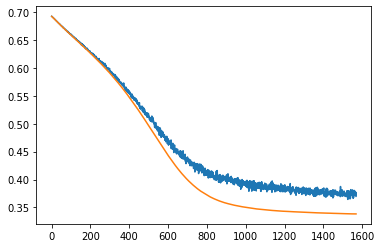

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

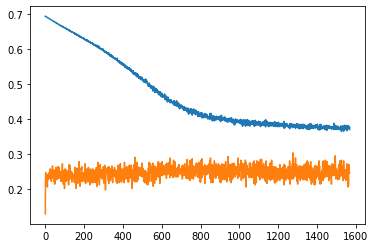

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [58]:
pred = model.predict(x_test)

In [59]:
# pred1 = []
# for i,x in enumerate(pred, start=0):
#   for j in x:
#     if j>0.3:
#       pred1[i].append(1)
#     else:
#       pred1[i].append(0)
# pred1

In [60]:
# from sklearn.metrics import multilabel_confusion_matrix
# multilabel_confusion_matrix(y_true=y_test,y_pred=pred)